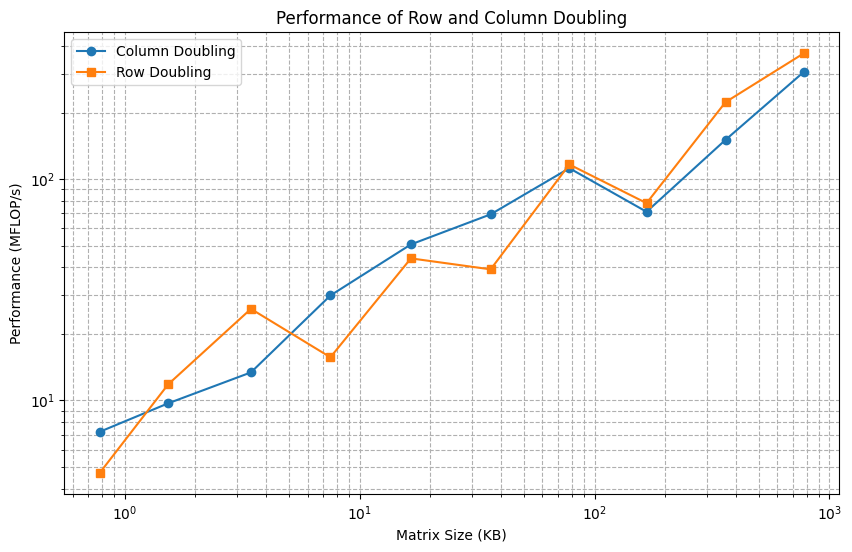

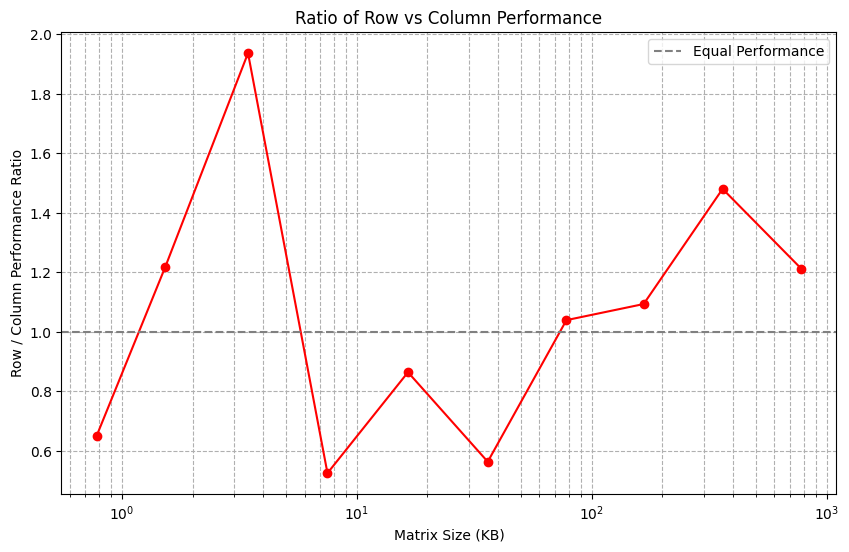

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from time import perf_counter

numbers = 1000  # Number of iterations


SIZES = np.logspace(1, 2.5, 10).astype(int)

performance_column = []
performance_row = []
matrix_sizes_kb = []

for SIZE in SIZES:
    mat = np.random.rand(SIZE, SIZE)
    sizes_kb = (SIZE ** 2) * 8 / 1024   # we have (SIZE * 2) numbers, that are 8 bytes and 1 KB = 1024 bytes 
    matrix_sizes_kb.append(sizes_kb)

    flops = SIZE * numbers * 2          # Two FLOPs per element one for multiplication and the other for assignment

    # Measure column operation
    t_start = perf_counter()
    for _ in range(numbers):
        double_column = 2 * mat[:, 0]
    t_end = perf_counter()
    time_column = t_end - t_start              # Execution time in seconds
    col_mflops = (flops / time_column) / 1e6   # Divide by 1e6 to convert FLOP/s to MFLOP/s
    performance_column.append(col_mflops)

    # Measure row operation
    t_start = perf_counter()
    for _ in range(numbers):
        double_row = 2 * mat[0, :]
    t_end = perf_counter()
    time_row = t_end - t_start                  # Execution time in seconds
    row_mflops = (flops / time_row) / 1e6       # Divide by 1e6 to convert FLOP/s to MFLOP/s
    performance_row.append(row_mflops)

# Compute performance ratio (row vs column)
performance_ratio = np.array(performance_row) / np.array(performance_column)

# Plot MFLOP/s vs Matrix Size (KB)
plt.figure(figsize=(10, 6))
plt.loglog(matrix_sizes_kb, performance_column, 'o-', label='Column Doubling')
plt.loglog(matrix_sizes_kb, performance_row, 's-', label='Row Doubling')
plt.xlabel('Matrix Size (KB)')
plt.ylabel('Performance (MFLOP/s)')
plt.title('Performance of Row and Column Doubling')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.savefig('figures/performance.png')
plt.show()

# Plot performance ratio (Row MFLOP/s / Column MFLOP/s)
plt.figure(figsize=(10, 6))
plt.semilogx(matrix_sizes_kb, performance_ratio, 'o-', color='red')
plt.axhline(y=1, color='gray', linestyle='--', label='Equal Performance')
plt.xlabel('Matrix Size (KB)')
plt.ylabel('Row / Column Performance Ratio')
plt.title('Ratio of Row vs Column Performance')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.savefig('figures/performance_ratio.png')
plt.show()


In [ ]:
Make a loglog plot of the performance of the row and column doubling as MFLOP/s over the size
of the matrix in kilobytes. Do they perform the same? How does their performance align with
the sizes of the CPU caches? Hint: you can read the cache sizes from the lscpuoutput.